In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
#Generate isotropic Gaussian blobs for clustering.
#it basically create cluster we will not use y 
#or _in place of y as unsupervised learning
#X,y =make_blobs(n_samples=500,n_features=2,centers=5,random_state=6)

In [ ]:
X[:10]


In [ ]:
X.shape

In [ ]:
#y[:10]

In [ ]:
#y.shape

In [ ]:
X ,_=make_blobs(n_samples=500,n_features=2,centers=5,random_state=10)
#centers is for how many groups we want

In [ ]:
X[:10,0]

In [ ]:
#X[:,feature1] ,X[:,feature2]
plt.scatter(X[:,0],X[:,1])
#five Cluster 
#we have to find labels for them for eg colour mapping 

In [ ]:
#first we make from scratch then we do by sklearn

In [ ]:
k=5

In [ ]:
color=["red","maroon","blue","yellow","orange"]

In [ ]:
#intialize clusters- centeroid by finding mean of data(centers) randomly
for i in range(k):
    center =np.random.randint(-8,10,size=(X.shape[1]))

In [ ]:
#np.random.randint(-8,10,size=(X.shape[1],))
#or this can be written as
np.random.randint(-8,10,size=(2,))

In [ ]:
(X.shape[1],)

In [ ]:
clusters = {}

# step 1


In [ ]:
# Initialize clusters

for i in range(k):
    center = np.random.randint(-8, 10, size= (X.shape[1],), )
    points = []
    
    cluster = {
        'center' : center,
        'points' : points,
        'color' : color[i]
    }
    
    clusters[i] = cluster

In [ ]:
clusters
#its a dictonary of all the clusters containing centers and color 
#now points is for the list of all points nearest to cluster centers

In [ ]:

for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    plt.scatter(center[0], center[1], c=clusters[i]['color'], s=300, marker="o")
    #here we also taking color from the repective cluster's color
    
plt.scatter(X[:, 0], X[:, 1])
    
plt.show()

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    plt.scatter(center[0], center[1], c=clusters[i]['color'], s=300, marker="o")
    #here we also taking color from the repective cluster's color
plt.show()

# Step2- Assign All points to nearest Cluster 

In [83]:
#it will iterate over all the points
#find the distance from all 5  =k and include which is nearest or less distance 

In [84]:
#Euclidean Distance b/w cluster pts and cluster center
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

In [85]:
def assignPointsToCluster(clusters, X):
    
    for ix in range(X.shape[0]):#iterate for all the examples
        distance_of_i = [] #we can make alist of five dist from cluster center
        
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w 
            #distance of the point with all the five (k) cluster crnters
            distance_of_i.append(d)
            
        cluster_to_choose = np.argmin(distance_of_i)
        #here we want min dist cluster center
        clusters[cluster_to_choose]['points'].append(X[ix])
        #here we are appending the cluster pts in pts list that are mini dist with center 

In [ ]:
clusters[0]["center"] 

In [87]:
assignPointsToCluster(clusters, X)

In [88]:
clusters[3]
#cluster center associated with the nearest point !! 

{'center': array([1, 1]),
 'points': [array([1.12565931, 6.32088416]),
  array([2.38696269, 4.11331935]),
  array([1.78177778, 4.1933899 ]),
  array([0.98099677, 5.59252857]),
  array([ 0.48548549, -3.11994247]),
  array([-0.17620056, -4.44563045]),
  array([1.41137496, 4.75681739]),
  array([1.95034397, 5.06021721]),
  array([2.43788247, 3.71524985]),
  array([1.40314511, 5.29946758]),
  array([ 1.49799137, -6.15350546]),
  array([ 1.21828954, -4.77134132]),
  array([ 1.24518935, -5.83289913]),
  array([ 0.31649182, -4.56170259]),
  array([1.64235649, 3.61838009]),
  array([ 1.36795963, -5.37940031]),
  array([ 2.21200675, -5.75055421]),
  array([1.73225492, 4.92248315]),
  array([ 0.42220747, -5.20999783]),
  array([ 0.61866966, -5.52849563]),
  array([ 0.02647603, -4.03841208]),
  array([1.66639614, 4.71854403]),
  array([2.09804703, 4.61590652]),
  array([ 0.16394086, -4.960832  ]),
  array([ 0.22775098, -4.19114434]),
  array([ 1.61490138, -4.78063789]),
  array([1.03802056, 5.411

In [89]:
# #plotting clusters
# for kx in range(k):
#         cluster_ke_points = clusters[kx]['points']
#         cluster_ka_color = clusters[kx]['color']
#         cluster_ka_center = clusters[kx]['center']
        
#         cluster_ke_points = np.array(cluster_ke_points)
#         #bcz cluster pts are array of list but we want array so 
#         print(cluster_ke_points.shape)
#         if len(cluster_ke_points)>0:
#             #if no point is associated with cluster center
#             plt.scatter(cluster_ke_points[:, 0], cluster_ke_points[:, 1], c=cluster_ka_color)
        
#         plt.scatter(cluster_ka_center[0], cluster_ka_center[1], c='black', s=300, marker="*")

In [90]:
def plotclusters(clusters):
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        cluster_ka_color = clusters[kx]['color']
        cluster_ka_center = clusters[kx]['center']
        
        cluster_ke_points = np.array(cluster_ke_points)
        print(cluster_ke_points.shape)
        if len(cluster_ke_points)>0:
            plt.scatter(cluster_ke_points[:, 0], cluster_ke_points[:, 1], c=cluster_ka_color)
        
        plt.scatter(cluster_ka_center[0], cluster_ka_center[1], c='black', s=300, marker="*")

# Step - 3 Update centers to mean of all points

In [91]:
def updateCluster(clusters):
    
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        
        cluster_ke_points = np.array(cluster_ke_points)
        
        if len(cluster_ke_points)>0:
            new_center = np.mean(cluster_ke_points, axis=0) #axis is along rows so will 
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge 

In [92]:

cluster_ke_points

NameError: name 'cluster_ke_points' is not defined

(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)


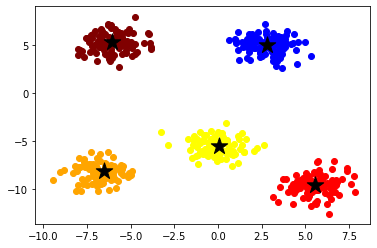

In [96]:
assignPointsToCluster(clusters, X)

plotclusters(clusters)

updateCluster(clusters)
#predictiion 

# Actual Outputs

In [97]:
#Actual 
#for seeing actual output u can check with this 
X,y =make_blobs(n_samples=500,n_features=2,centers=5,random_state=10)

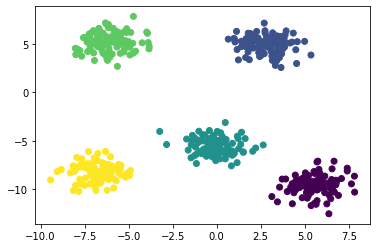

In [98]:
#y is label here 
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

# from Sklearn - KMeans++

In [100]:
from sklearn.cluster import KMeans

In [101]:
km = KMeans(n_clusters=5)
# init='k-means++' defaultly kmeans is set above we have done randomly
"""init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

n_init : int, default=10
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia."""

"init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'\n    Method for initialization, defaults to 'k-means++':\n\n    'k-means++' : selects initial cluster centers for k-mean\n    clustering in a smart way to speed up convergence. See section\n    Notes in k_init for more details.\n\n    'random': choose k observations (rows) at random from data for\n    the initial centroids.\n\n    If an ndarray is passed, it should be of shape (n_clusters, n_features)\n    and gives the initial centers.\n\nn_init : int, default=10\n    Number of time the k-means algorithm will be run with different\n    centroid seeds. The final results will be the best output of\n    n_init consecutive runs in terms of inertia."

In [109]:
y #this we will not use in fit as unsupervised learning

array([3, 1, 2, 3, 1, 0, 3, 2, 0, 4, 0, 0, 1, 1, 4, 1, 4, 0, 0, 3, 0, 3,
       2, 3, 4, 3, 4, 1, 3, 3, 1, 1, 4, 1, 0, 2, 0, 2, 1, 2, 3, 3, 1, 2,
       1, 0, 3, 0, 1, 3, 4, 3, 0, 4, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 3, 4,
       3, 2, 3, 4, 4, 2, 2, 2, 3, 3, 4, 2, 2, 1, 2, 1, 3, 0, 3, 2, 1, 4,
       0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 1, 4, 3, 4, 4, 4, 2, 1, 3, 2, 0, 1,
       4, 0, 1, 1, 3, 3, 3, 0, 3, 0, 1, 0, 2, 3, 0, 3, 0, 3, 2, 2, 0, 3,
       4, 1, 2, 2, 2, 1, 3, 4, 1, 2, 3, 3, 3, 0, 1, 2, 0, 0, 2, 4, 0, 0,
       4, 3, 4, 1, 4, 3, 1, 1, 1, 4, 1, 1, 0, 2, 3, 3, 3, 3, 3, 2, 2, 4,
       3, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3, 1, 4, 4, 2, 4, 3,
       0, 1, 3, 4, 4, 1, 1, 1, 2, 3, 0, 2, 2, 1, 1, 0, 3, 2, 2, 4, 2, 4,
       1, 0, 1, 2, 3, 0, 4, 4, 4, 4, 2, 4, 4, 0, 4, 4, 2, 2, 3, 3, 4, 1,
       2, 2, 2, 1, 1, 3, 4, 4, 4, 3, 3, 1, 4, 4, 4, 0, 3, 2, 0, 0, 2, 1,
       0, 3, 2, 3, 0, 2, 4, 1, 4, 1, 0, 4, 4, 0, 3, 0, 0, 0, 2, 2, 0, 2,
       1, 3, 0, 4, 1, 2, 0, 0, 2, 4, 2, 4, 0, 4, 0,

In [110]:
km.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [111]:
print(km.labels_)
#so it associate every point with each clusters 

[2 3 0 2 3 1 2 0 1 4 1 1 3 3 4 3 4 1 1 2 1 2 0 2 4 2 4 3 2 2 3 3 4 3 1 0 1
 0 3 0 2 2 3 0 3 1 2 1 3 2 4 2 1 4 0 0 3 1 3 3 3 0 0 0 2 4 2 0 2 4 4 0 0 0
 2 2 4 0 0 3 0 3 2 1 2 0 3 4 1 3 3 0 2 3 1 0 3 2 3 4 2 4 4 4 0 3 2 0 1 3 4
 1 3 3 2 2 2 1 2 1 3 1 0 2 1 2 1 2 0 0 1 2 4 3 0 0 0 3 2 4 3 0 2 2 2 1 3 0
 1 1 0 4 1 1 4 2 4 3 4 2 3 3 3 4 3 3 1 0 2 2 2 2 2 0 0 4 2 0 0 3 3 1 3 3 3
 3 1 0 3 3 3 2 3 4 4 0 4 2 1 3 2 4 4 3 3 3 0 2 1 0 0 3 3 1 2 0 0 4 0 4 3 1
 3 0 2 1 4 4 4 4 0 4 4 1 4 4 0 0 2 2 4 3 0 0 0 3 3 2 4 4 4 2 2 3 4 4 4 1 2
 0 1 1 0 3 1 2 0 2 1 0 4 3 4 3 1 4 4 1 2 1 1 1 0 0 1 0 3 2 1 4 3 0 1 1 0 4
 0 4 1 4 1 0 4 0 3 3 1 4 1 3 0 3 0 3 0 0 4 1 0 0 3 4 0 1 4 0 0 4 1 0 4 0 2
 2 2 1 1 2 1 4 3 1 3 1 4 1 1 2 2 3 1 1 1 1 4 0 1 3 1 3 4 2 4 4 1 4 2 2 4 4
 2 4 1 2 4 0 4 1 1 1 1 1 0 2 3 3 3 2 2 1 1 4 4 0 2 0 0 3 1 3 4 1 2 2 2 1 4
 3 3 4 2 1 3 0 0 1 4 4 2 4 3 2 4 0 4 4 1 4 1 4 3 0 2 2 2 4 3 2 2 1 0 3 1 2
 3 2 1 1 2 0 2 1 2 0 4 2 1 0 2 2 3 2 2 3 3 3 4 0 0 3 2 0 3 0 0 0 4 1 1 1 0
 4 4 3 1 3 4 4 1 4 2 1 0 

In [104]:
km.cluster_centers_
#these are cluster centers !!

array([[-6.06533341,  5.2400571 ],
       [-0.06909909, -5.56399319],
       [ 2.78561142,  4.93182424],
       [ 5.56873506, -9.60861515],
       [-6.78567723, -8.26282547]])

In [106]:
km.inertia_

872.8554968701876

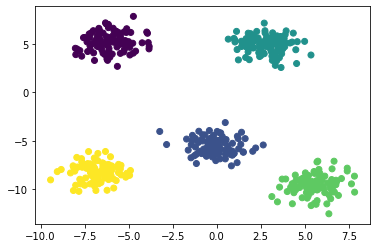

In [107]:
plt.scatter(X[:,0], X[:, 1], c= km.labels_)
